# Metrics Analyses

This notebooks summarize metric's results on evaluation set, do learning, and plotting

In [1]:
import os
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import pprint

sns.set(font_scale=1.3)
sns.set_style("whitegrid", {
    "grid.linestyle": 'dashed',
    "axes.edgecolor": '#475569',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial',
        # 'Nimbus Sans',
        'Droid Sans',
        'sans-serif'
    ],
})

%matplotlib inline

ROOT_DIR = os.path.dirname(os.getcwd())
root_dir = Path(ROOT_DIR)

## 0. Gini Scores

Randomly initialized models
[{'decoder_act': 'softmax',
  'mean': tensor([0.2498, 0.2576, 0.2693, 0.2547, 0.2623, 0.2711]),
  'std': tensor([0.0421, 0.0370, 0.0382, 0.0308, 0.0366, 0.0336])},
 {'decoder_act': 'entmax15',
  'mean': tensor([0.8609, 0.8901, 0.8948, 0.8986, 0.8901, 0.8952]),
  'std': tensor([0.0245, 0.0192, 0.0184, 0.0165, 0.0188, 0.0182])},
 {'decoder_act': 'sparsemax',
  'mean': tensor([0.9760, 0.9816, 0.9795, 0.9841, 0.9806, 0.9816]),
  'std': tensor([0.0027, 0.0022, 0.0036, 0.0016, 0.0026, 0.0025])}]
Trained models
[{'decoder_act': 'softmax',
  'mean': tensor([0.9626, 0.9884, 0.9814, 0.9809, 0.9438, 0.9432]),
  'std': tensor([0.0054, 0.0024, 0.0024, 0.0031, 0.0082, 0.0087])},
 {'decoder_act': 'entmax15',
  'mean': tensor([0.9764, 0.9913, 0.9877, 0.9884, 0.9902, 0.9888]),
  'std': tensor([0.0046, 0.0011, 0.0021, 0.0021, 0.0016, 0.0019])},
 {'decoder_act': 'sparsemax',
  'mean': tensor([0.9940, 0.9961, 0.9973, 0.9966, 0.9970, 0.9971]),
  'std': tensor([0.0009, 0.0004, 0.

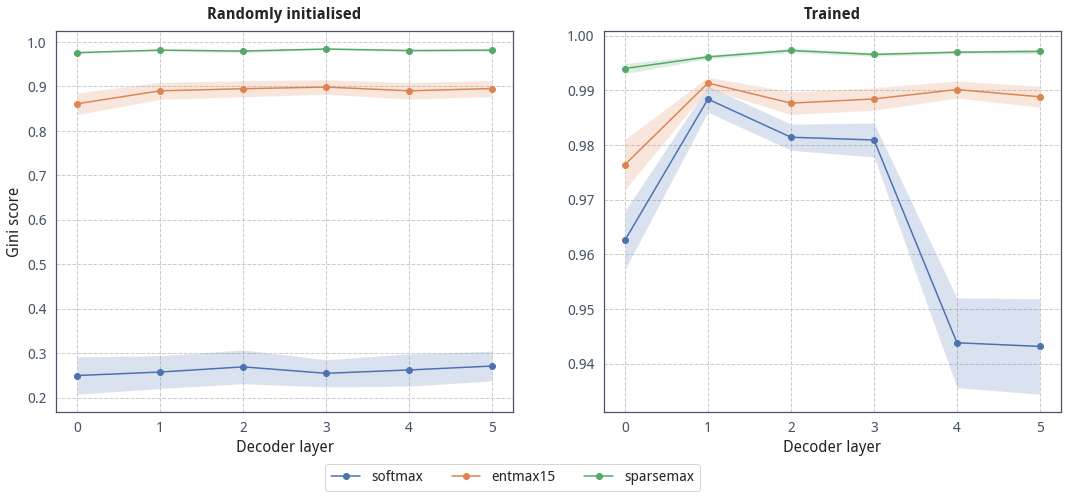

In [2]:
fig, axlist = plt.subplots(1, 2, figsize=(18, 7))

ax1, ax2 = axlist

# Randomly initialise
data = []
filenames = ["softmax-gini-random.pt", "entmax15-gini-random.pt", "sparsemax-gini-random.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

print("Randomly initialized models")
pprint.pprint(data)

for item in data:
    ax1.plot(item['mean'], marker='o', label=item['decoder_act'])
    ax1.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax1.set_title("Randomly initialised", pad=12, fontweight="bold")
ax1.set_xlabel("Decoder layer")
ax1.set_ylabel("Gini score")
ax1.tick_params(colors='#475569')

# Train models
data = []
filenames = ["softmax-gini.pt", "entmax15-gini.pt", "sparsemax-gini.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

print("Trained models")
pprint.pprint(data)

for item in data:
    ax2.plot(item['mean'], marker='o', label=item['decoder_act'])
    ax2.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax2.set_title("Trained", pad=12, fontweight="bold")
ax2.set_xlabel("Decoder layer")
ax2.tick_params(colors='#475569')

# Gather common legends
axlist.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(1.0, -0.12), ncol=3)
fig.savefig("./images/gini-scores.png", bbox_inches='tight')
fig.savefig("./images/gini-scores.pdf", bbox_inches='tight')

## 1. Zero entries ratio

This section presents the results for **zero-entries ratio** metric that we have computed for the baseline softmax, entmax15 and sparsemax models, both randomly initialised and trained.

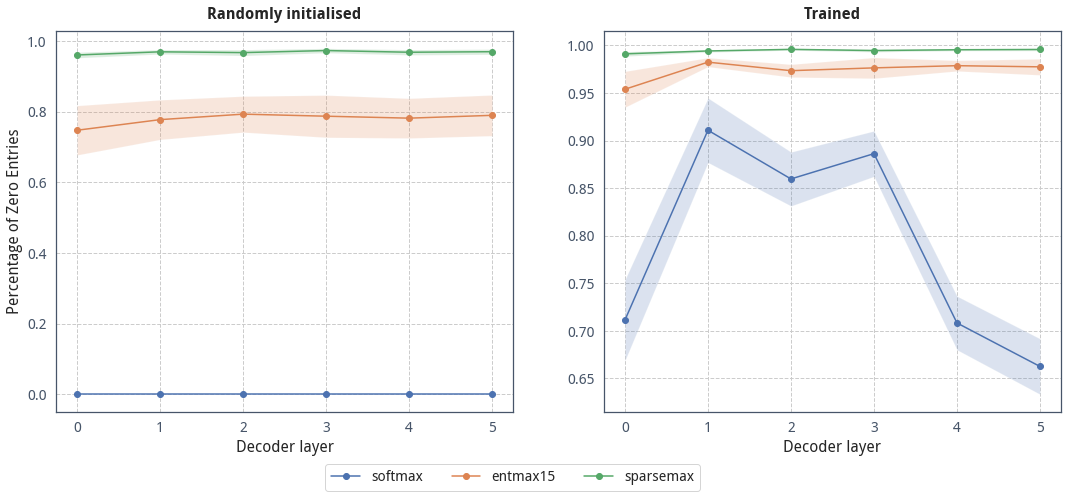

In [3]:
fig, axlist = plt.subplots(1, 2, figsize=(18, 7))

ax1, ax2 = axlist

# Randomly initialise
data = []
filenames = ["softmax-zeros_ratio-1e-06-random.pt", "entmax15-zeros_ratio-random.pt", "sparsemax-zeros_ratio-random.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

for item in data:
    ax1.plot(item['mean'], marker='o', label=item['decoder_act'])
    ax1.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax1.set_title("Randomly initialised", pad=12, fontweight="bold")
ax1.set_xlabel("Decoder layer")
ax1.set_ylabel("Percentage of Zero Entries")
ax1.tick_params(colors='#475569')

# Train models
data = []
filenames = ["softmax-zeros_ratio-1e-06.pt", "entmax15-zeros_ratio.pt", "sparsemax-zeros_ratio.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

for item in data:
    ax2.plot(item['mean'], marker='o', label=item['decoder_act'])
    ax2.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax2.set_title("Trained", pad=12, fontweight="bold")
ax2.set_xlabel("Decoder layer")
ax2.tick_params(colors='#475569')

# Gather common legends
axlist.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(1.0, -0.12), ncol=3)
# fig.savefig("./images/perc_zeros-scores.png", bbox_inches='tight')
# fig.savefig("./images/perc_zeros-scores.pdf", bbox_inches='tight')